# Dacon주최 Covid 데이터 분석 대회 준비

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
region = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Region.csv")
timeprovince = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeProvince.csv")
timegender = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeGender.csv")
timeage = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/TimeAge.csv")
time = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Time.csv")
patientinfo = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientInfo.csv")
patientroute = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/PatientRoute.csv")
case = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Case.csv")
weather = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/Weather.csv")

In [3]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [4]:
case.shape

(81, 8)

In [5]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         81 non-null     int64 
 1   province        81 non-null     object
 2   city            81 non-null     object
 3   group           81 non-null     bool  
 4   infection_case  81 non-null     object
 5   confirmed       81 non-null     int64 
 6   latitude        81 non-null     object
 7   longitude       81 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [7]:
case.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [10]:
case.columns = ['환자번호','시도','군구','집단감염여부','집단감염장소','확진자누적수','위도','경도']
case.head()

,환자번호,시도,군구,집단감염여부,집단감염장소,확진자누적수,위도,경도
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [11]:
import seaborn as sns

In [26]:
case['집단감염장소'].value_counts()

etc                                      17
Shincheonji Church                       15
contact with patient                      8
overseas inflow                           5
Cheongdo Daenam Hospital                  3
Guro-gu Call Center                       3
Onchun Church                             2
Seosan-si Laboratory                      2
gym facility in Cheonan                   2
Geochang-gun Woongyang-myeon              1
Jin-gu Academy                            1
Dongan Church                             1
Changnyeong Coin Karaoke                  1
Suwon Saeng Myeong Saem Church            1
Bundang Jesaeng Hospital                  1
Pilgrimage to Israel                      1
Ministry of Oceans and Fisheries          1
Jung-gu Fashion Company                   1
River of Grace Community Church           1
Jongno Community Center                   1
Hanmaeum Changwon Hospital                1
Goesan-gun Jangyeon-myeon                 1
Eunpyeong St. Mary's Hospital   

In [34]:
df_location = pd.DataFrame(case.groupby(['집단감염장소'])['확진자누적수'].max())
df_location = df_location.sort_values(by=['확진자누적수'], ascending=False).reset_index()
df_location.head()

,집단감염장소,확진자누적수
0,Shincheonji Church,4359
1,etc,1056
2,contact with patient,649
3,Cheongdo Daenam Hospital,119
4,gym facility in Cheonan,104


In [37]:
from plotnine import *

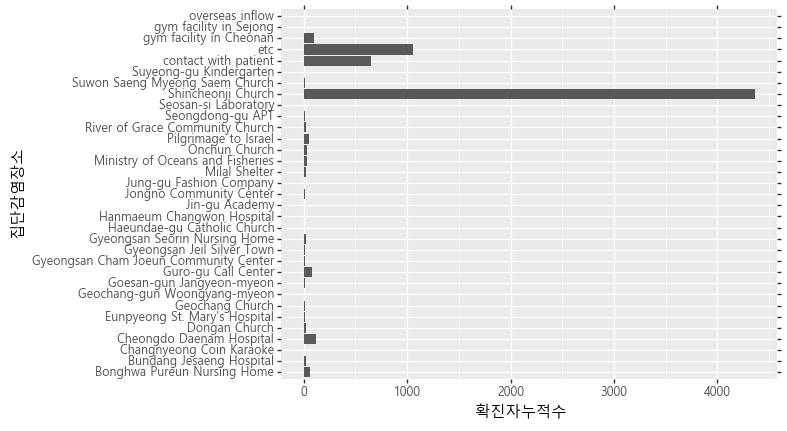

<ggplot: (141719547312)>

In [41]:
(ggplot(df_location)
 +aes(x='집단감염장소', y='확진자누적수')
 +geom_bar(stat='identity', position='dodge')
 +coord_flip()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [47]:
case.head()

,환자번호,시도,군구,집단감염여부,집단감염장소,확진자누적수,위도,경도
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [52]:
case['집단감염장소'] = case['집단감염장소'].str.replace("\n","")

In [64]:
group_location = case.loc[:,['집단감염장소','위도','경도']].drop_duplicates().reset_index(drop=True)
group_location.head()

,집단감염장소,위도,경도
0,Guro-gu Call Center,37.508163,126.884387
1,Dongan Church,37.592888,127.056766
2,Eunpyeong St. Mary's Hospital,37.63369,126.9165
3,Seongdong-gu APT,37.55713,127.0403
4,Jongno Community Center,37.57681,127.006


In [65]:
group_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   집단감염장소  39 non-null     object
 1   위도      39 non-null     object
 2   경도      39 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [69]:
group_location['경도'].value_counts()

-             10
127.161627     1
128.4941       1
129.1124       1
129.1256       1
126.884387     1
127.1139       1
127.9552       1
127.917805     1
127.0517       1
127.289        1
129.0771       1
127.056766     1
127.1218       1
126.984377     1
127.9127       1
128.5008       1
129.0633       1
128.5667       1
128.801498     1
128.7621       1
127.006        1
128.7373       1
127.265172     1
128.7368       1
126.9165       1
128.6866       1
126.354443     1
127.0403       1
128.9099       1
Name: 경도, dtype: int64

In [72]:
group_location = group_location.loc[(group_location['경도'] != '-') | (group_location['위도'] != '-')]
group_location

,집단감염장소,위도,경도
0,Guro-gu Call Center,37.508163,126.884387
1,Dongan Church,37.592888,127.056766
2,Eunpyeong St. Mary's Hospital,37.63369,126.9165
3,Seongdong-gu APT,37.55713,127.0403
4,Jongno Community Center,37.57681,127.006
5,Jung-gu Fashion Company,37.562405,126.984377
8,Onchun Church,35.21628,129.0771
9,Suyeong-gu Kindergarten,35.16708,129.1124
10,Haeundae-gu Catholic Church,35.20599,129.1256
11,Jin-gu Academy,35.17371,129.0633


In [73]:
group_location['위도'] = group_location['위도'].astype(float)
group_location['경도'] = group_location['경도'].astype(float)
group_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   집단감염장소  29 non-null     object 
 1   위도      29 non-null     float64
 2   경도      29 non-null     float64
dtypes: float64(2), object(1)
memory usage: 928.0+ bytes


In [74]:
import folium
geo_df = group_location

## 위도 경도 이용해 지도표시 못함 ↑

# ---------------------------------------------------------------------------------------------------------

In [43]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [44]:
time.shape

(61, 7)

In [46]:
time.columns = ['날짜', '시간', '검사자누적숫자','음성누적숫자','양성누적숫자','완치자누적숫자','사망자누적숫자']
time.head()

,날짜,시간,검사자누적숫자,음성누적숫자,양성누적숫자,완치자누적숫자,사망자누적숫자
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
